In [2]:
import pandas as pd
import numpy as np
from astropy.time import Time
import matplotlib.pyplot as plt


In [3]:
# Convert the data into allesfitter-compliant format
def convert_to_scientific_notation(input_csv, output_csv=None):
    # Read the CSV file into a DataFrame unless a DataFrame is passed
    if isinstance(input_csv, str):
        df = pd.read_csv(input_csv)
    else:
        df = input_csv
        
    # Apply scientific notation with 18 digits after the decimal to each column
    for col in df.columns:
        # Check if the column is of a numeric type
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].apply(lambda x: format(x, '.18e'))

    # If an output file is specified, save the result to this file
    if output_csv:
        df.to_csv(output_csv, index=False)
    else:
        # Otherwise, return the DataFrame
        return df

In [4]:
# Load the raw astep data from "data/astep/raw/TIC382200986-01_20220824_ASTEP-ANTARCTICA_R_measurements.csv", also TIC382200986-01_20230528_ASTEP-ANTARCTICA_B_measurements, TIC382200986-01_20230528_ASTEP-ANTARCTICA_B_measurements, and TIC382200986-32_20210819_ASTEP-ANTARCTICA_Rc_measurements
df1 = pd.read_csv('../data/astep/raw/TIC382200986-01_20220824_ASTEP-ANTARCTICA_R_measurements.csv')
df2 = pd.read_csv('../data/astep/raw/TIC382200986-01_20230528_ASTEP-ANTARCTICA_B_measurements.csv')
df3 = pd.read_csv('../data/astep/raw/TIC382200986-01_20230528_ASTEP-ANTARCTICA_R_measurements.csv')
df4 = pd.read_csv('../data/astep/raw/TIC382200986-32_20210819_ASTEP-ANTARCTICA_Rc_measurements.csv')

# Keep only the first 3 columns, and rename them to time, flux, flux_err
df1 = df1.iloc[:, :3]
df2 = df2.iloc[:, :3]
df3 = df3.iloc[:, :3]
df4 = df4.iloc[:, :3]
df1.columns = ['time', 'flux', 'flux_err']
df2.columns = ['time', 'flux', 'flux_err']
df3.columns = ['time', 'flux', 'flux_err']
df4.columns = ['time', 'flux', 'flux_err']

# For df1 and 4, add 2450000.0 to the first column, and for 2 and 3, add 2460000.0
df1['time'] = df1['time'].apply(lambda x: x + 2450000.0)
df2['time'] = df2['time'].apply(lambda x: x + 2460000.0)
df3['time'] = df3['time'].apply(lambda x: x + 2460000.0)
df4['time'] = df4['time'].apply(lambda x: x + 2450000.0)

# Remove 2458000.0 from the first column
df1['time'] = df1['time'].apply(lambda x: x - 2458000.0)
df2['time'] = df2['time'].apply(lambda x: x - 2458000.0)
df3['time'] = df3['time'].apply(lambda x: x - 2458000.0)
df4['time'] = df4['time'].apply(lambda x: x - 2458000.0)

# Round the first column to 5 decimal places
df1['time'] = df1['time'].apply(lambda x: round(x, 5))
df2['time'] = df2['time'].apply(lambda x: round(x, 5))
df3['time'] = df3['time'].apply(lambda x: round(x, 5))
df4['time'] = df4['time'].apply(lambda x: round(x, 5))

# Convert to scientific notation
# df1 = convert_to_scientific_notation(df1)
# df2 = convert_to_scientific_notation(df2)
# df3 = convert_to_scientific_notation(df3)
# df4 = convert_to_scientific_notation(df4)

# Save the dataframes as csv files
df1.to_csv('../data/astep/allesfitter_converted_2458/TIC382200986-01_20220824_ASTEP-ANTARCTICA_R_measurements.csv', index=False)
df2.to_csv('../data/astep/allesfitter_converted_2458/TIC382200986-01_20230528_ASTEP-ANTARCTICA_B_measurements.csv', index=False)
df3.to_csv('../data/astep/allesfitter_converted_2458/TIC382200986-01_20230528_ASTEP-ANTARCTICA_R_measurements.csv', index=False)
df4.to_csv('../data/astep/allesfitter_converted_2458/TIC382200986-32_20210819_ASTEP-ANTARCTICA_Rc_measurements.csv', index=False)

# Comment the first line of each of the above 4 files with #
for filename in ['TIC382200986-01_20220824_ASTEP-ANTARCTICA_R_measurements.csv', 'TIC382200986-01_20230528_ASTEP-ANTARCTICA_B_measurements.csv', 'TIC382200986-01_20230528_ASTEP-ANTARCTICA_R_measurements.csv', 'TIC382200986-32_20210819_ASTEP-ANTARCTICA_Rc_measurements.csv']:
    with open('../data/astep/allesfitter_converted_2458/' + filename, 'r') as f:
        lines = f.readlines()
    lines[0] = '#' + lines[0]
    with open('../data/astep/allesfitter_converted_2458/' + filename, 'w') as f:
        f.writelines(lines)
        


<Axes: xlabel='time', ylabel='flux'>

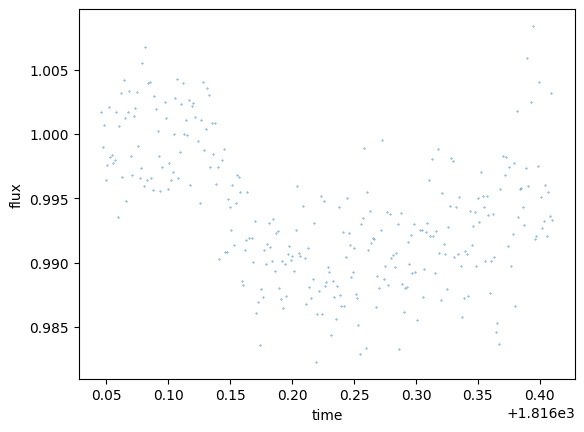

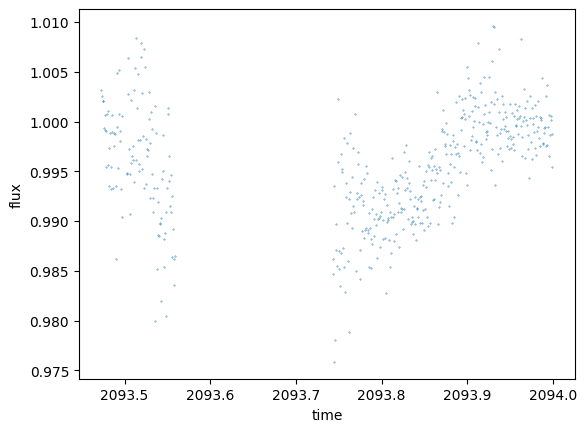

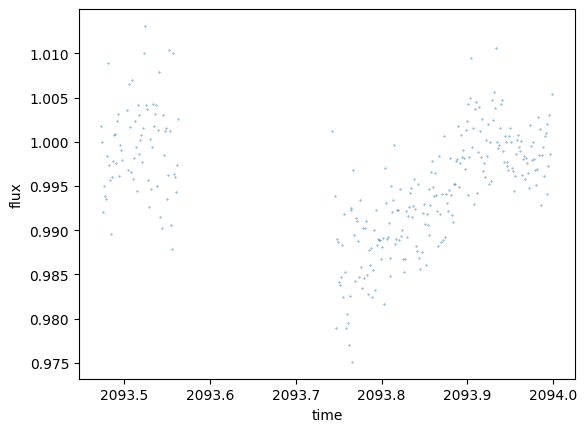

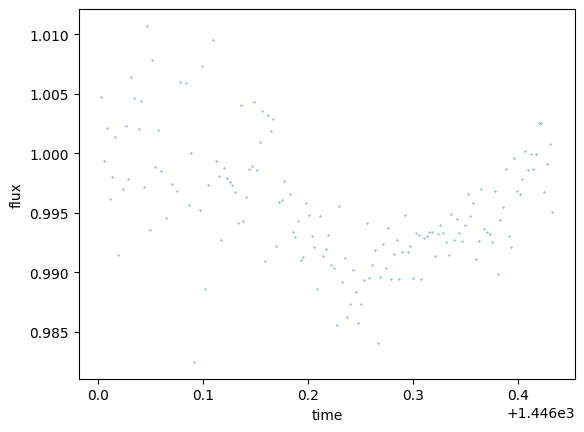

In [5]:
# Load the above 4 files
df1 = pd.read_csv('../data/astep/allesfitter_converted_2458/TIC382200986-01_20220824_ASTEP-ANTARCTICA_R_measurements.csv')
df2 = pd.read_csv('../data/astep/allesfitter_converted_2458/TIC382200986-01_20230528_ASTEP-ANTARCTICA_B_measurements.csv')
df3 = pd.read_csv('../data/astep/allesfitter_converted_2458/TIC382200986-01_20230528_ASTEP-ANTARCTICA_R_measurements.csv')
df4 = pd.read_csv('../data/astep/allesfitter_converted_2458/TIC382200986-32_20210819_ASTEP-ANTARCTICA_Rc_measurements.csv')

# Remove the # from the first line of each of the above 3 files
df1.columns = df1.columns.str.replace('#', '')
df2.columns = df2.columns.str.replace('#', '')
df3.columns = df3.columns.str.replace('#', '')
df4.columns = df4.columns.str.replace('#', '')

# Plot the data
df1.plot(x='time', y='flux', kind='scatter', s=0.1)
df2.plot(x='time', y='flux', kind='scatter', s=0.1)
df3.plot(x='time', y='flux', kind='scatter', s=0.1)
df4.plot(x='time', y='flux', kind='scatter', s=0.1)

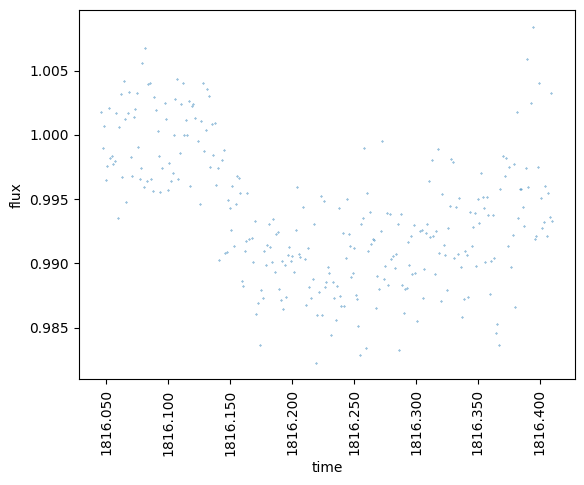

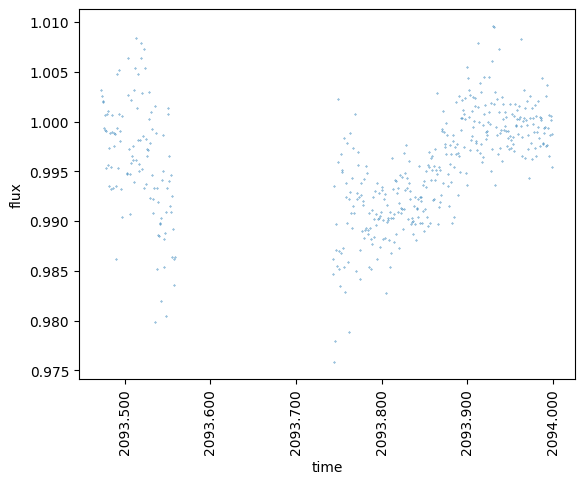

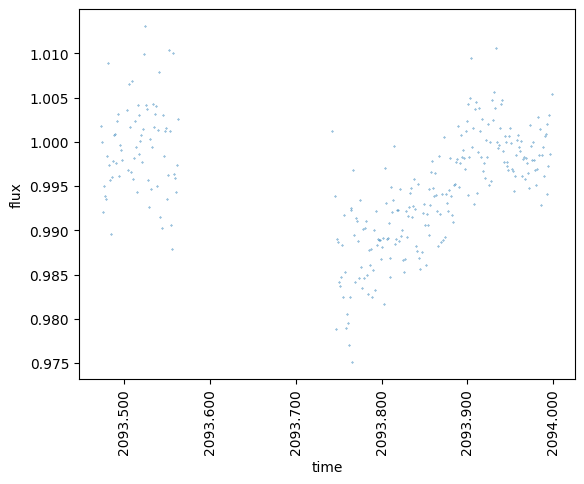

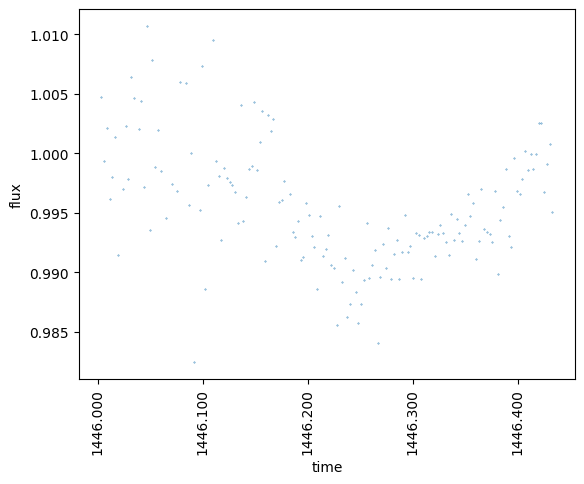

In [6]:
# Plot the data with the x axis with angled ticks and written in full values
df1.plot(x='time', y='flux', kind='scatter', s=0.1, rot=90).get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))
# df2.plot(x='time', y='flux', kind='scatter', s=0.1, rot=90).xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}')).figure.axes[0].set_xlabel('Time (BJD+2458000)')
df2.plot(x='time', y='flux', kind='scatter', s=0.1, rot=90).get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))
df3.plot(x='time', y='flux', kind='scatter', s=0.1, rot=90).get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))
df4.plot(x='time', y='flux', kind='scatter', s=0.1, rot=90).get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))


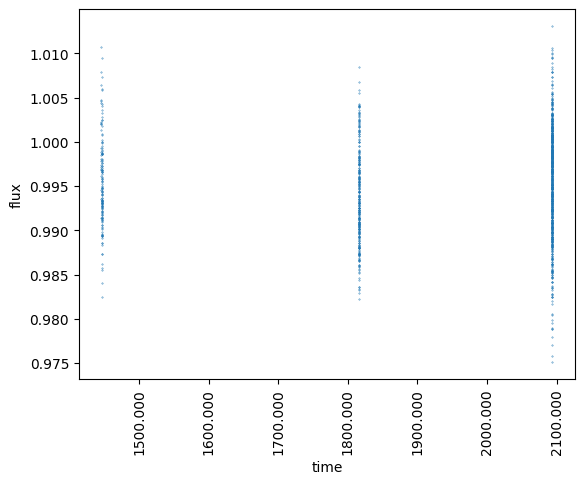

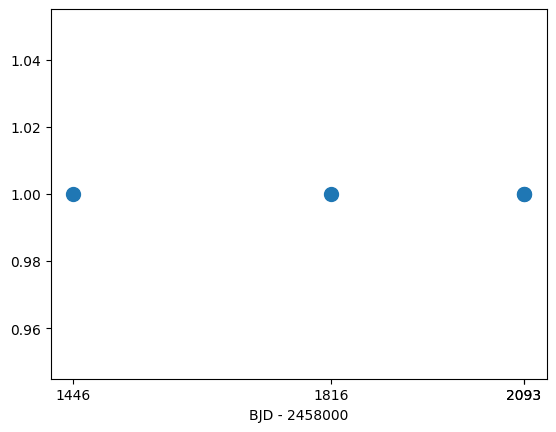

In [7]:
# Combine the above 4 dfs into one and plot it
df = pd.concat([df1, df2, df3, df4])
df.plot(x='time', y='flux', kind='scatter', s=0.1, rot=90).get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))

# For each df, drop all except the first row
df1 = df1.iloc[0:1]
df2 = df2.iloc[0:1]
df3 = df3.iloc[0:1]
df4 = df4.iloc[0:1]

# Combine the above 4 dfs into one and plot it
df = pd.concat([df1, df2, df3, df4])
# df.plot(x='time', y='flux', kind='scatter', s=0.1, rot=0).get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))

# Change each value of flux to exactly 1.0
df['flux'] = 1.0

# Plotting
fig, ax = plt.subplots()
scatter = ax.scatter(df['time'], df['flux'], s=100)

# Customizing the x-axis to show labels only at data points
ax.set_xticks(df['time'])
ax.set_xticklabels([f'{x:.0f}' for x in df['time']], rotation=0)
ax.set_xlabel("BJD - 2458000")

plt.show()

In [8]:
# Export df to a csv file in ./tmp_csvs_single_per_obs
df.to_csv('./tmp_csvs_single_per_obs/astep.csv', index=False)
